In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [2]:
pip install imagehash pillow


Note: you may need to restart the kernel to use updated packages.


In [21]:
from PIL import Image
import imagehash
import os

# Specify the directory containing your images
image_directory =r'C:\Users\acer\Documents\Major Project\Dataset\Data\train'

# Create a dictionary to store unique image hashes
unique_hashes = {}

# Create a folder to move duplicates (if needed)
duplicates_folder = r'C:\Users\acer\Documents\Major Project\duplicate'
os.makedirs(duplicates_folder, exist_ok=True)

# Loop through the images in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
        # Load the image
        image_path = os.path.join(image_directory, filename)
        image = Image.open(image_path)

        # Calculate the dhash of the image (you can use other hash functions like phash or average hash)
        image_hash = imagehash.dhash(image)

        # Check if the hash is already in the dictionary
        if image_hash not in unique_hashes:
            unique_hashes[image_hash] = image_path
        else:
            # If a duplicate is found, move it to the 'duplicates' folder
            duplicate_path = os.path.join(duplicates_folder, filename)
            os.rename(image_path, duplicate_path)

# Extract the paths of unique images
unique_image_paths = list(unique_hashes.values())

# Print the paths of unique images
for image_path in unique_image_paths:
    print(image_path)


In [23]:
training_data_genetation=ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

testing_data_generation=ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
)

In [24]:
training_set=training_data_genetation.flow_from_directory(
    r'C:\Users\acer\Documents\Major Project\Dataset\Data\train',
    target_size=(64,64),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)

Found 21598 images belonging to 2 classes.


In [25]:
testing_set=training_data_genetation.flow_from_directory(
    r'C:\Users\acer\Documents\Major Project\Dataset\Data\test',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 7000 images belonging to 2 classes.


In [26]:
cnn=tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01),input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=1024,kernel_size=3,padding='same',activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

cnn.add(tf.keras.layers.Dense(units=128,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))

cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [27]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\acer\Documents\Major Project\fire_and_smoke.h5',
                                            monitor='val_loss',mode="min",
                                            save_best_only=True)

callbacks=checkpoint

In [28]:
cnn.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [29]:
cnn.fit(
    x=training_set,
    validation_data=testing_set,
    epochs=30,callbacks=callbacks
)

Epoch 1/30
675/675 [==============================] - 732s 1s/step - loss: 0.1690 - accuracy: 0.9428 - val_loss: 0.1165 - val_accuracy: 0.9486
Epoch 2/30
675/675 [==============================] - 946s 1s/step - loss: 0.1026 - accuracy: 0.9682 - val_loss: 0.0880 - val_accuracy: 0.9677
Epoch 3/30
675/675 [==============================] - 781s 1s/step - loss: 0.0912 - accuracy: 0.9718 - val_loss: 0.0736 - val_accuracy: 0.9716
Epoch 4/30
675/675 [==============================] - 721s 1s/step - loss: 0.0844 - accuracy: 0.9750 - val_loss: 0.0634 - val_accuracy: 0.9806
Epoch 5/30
675/675 [==============================] - 726s 1s/step - loss: 0.0803 - accuracy: 0.9766 - val_loss: 0.0605 - val_accuracy: 0.9804
Epoch 6/30
675/675 [==============================] - 718s 1s/step - loss: 0.0771 - accuracy: 0.9762 - val_loss: 0.0820 - val_accuracy: 0.9697
Epoch 7/30
675/675 [==============================] - 721s 1s/step - loss: 0.0785 - accuracy: 0.9757 - val_loss: 0.0732 - val_accuracy: 0.9767

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [31]:
data=pd.read_csv(r'C:\Users\acer\Documents\Major Project\accuracy_value.csv',delimiter=',')
data

,epoch,relu (Adam),leaky relu (Adam),relu (RMSprop),leaky relu (RMSprop)
0,1,0.9671,0.9731,0.9664,0.9670
1,2,0.9841,0.9750,0.9838,0.9771
2,3,0.9873,0.9837,0.9851,0.9827
3,4,0.9808,0.9861,0.9857,0.9840
4,5,0.9878,0.9897,0.9818,0.9808
5,6,0.9919,0.9905,0.9817,0.9845
6,7,0.9910,0.9918,0.9854,0.9858
7,8,0.9924,0.9916,0.9843,0.9866
8,9,0.9937,0.9943,0.9872,0.9852
9,10,0.9916,0.9926,0.9857,0.9840


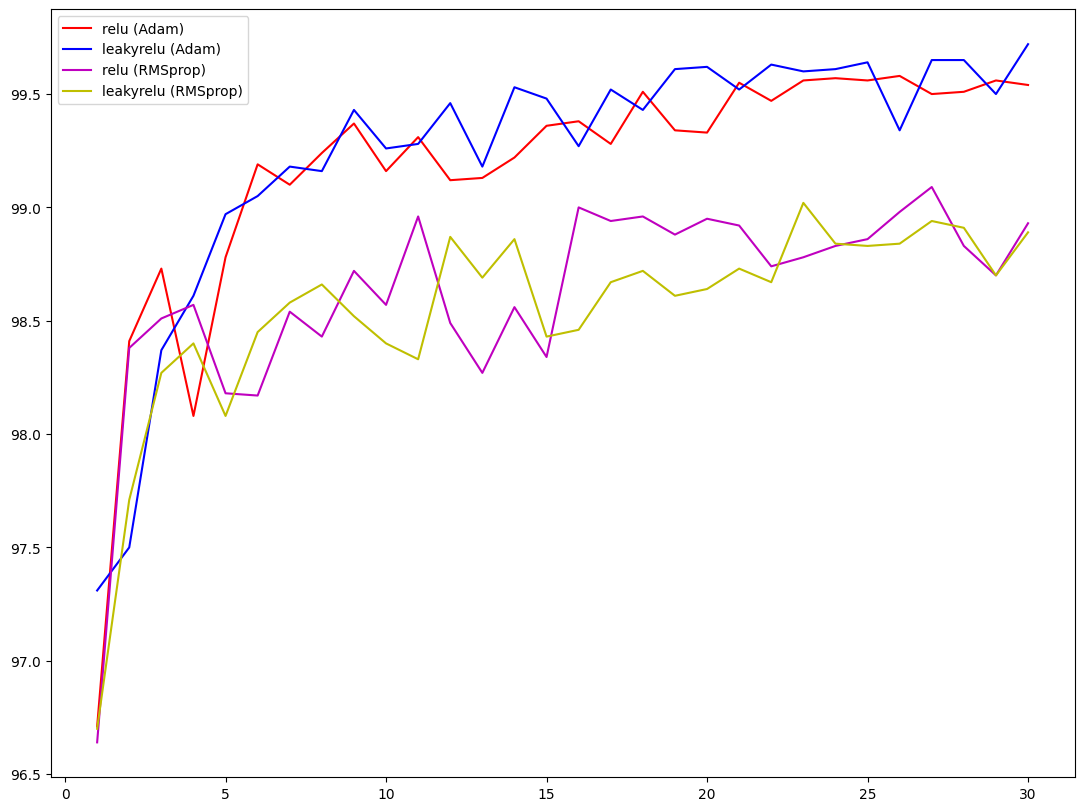

In [32]:
epoch=data['epoch']
relu_adam=100*data['relu (Adam)']
leaky_relu_adam=100*data['leaky relu (Adam)']
relu_RMSprop=100*data['relu (RMSprop)']
leaky_relu_RMSprop=100*data['leaky relu (RMSprop)']
fig=plt.figure()
myaxis=fig.add_axes([0.1,0.1,1.6,1.6])
myaxis.plot(epoch,relu_adam,'r',label='relu (Adam)')
myaxis.plot(epoch,leaky_relu_adam,'b',label='leakyrelu (Adam)')
myaxis.plot(epoch,relu_RMSprop,'m',label='relu (RMSprop)')
myaxis.plot(epoch,leaky_relu_RMSprop,'y',label='leakyrelu (RMSprop)')
myaxis.legend()

In [34]:
from tensorflow.keras.models import load_model
cnn=load_model(r'C:\Users\acer\Documents\Major Project\fire_and_smoke.h5')

In [35]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 256)        0

In [36]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import PIL
import numpy as np
from tensorflow.keras.models import load_model

In [39]:
test_image=r'C:\Users\acer\Documents\Major Project\Dataset\Data\test\fire\Fire (37).png'

1/1 [==============================] - 1s 534ms/step


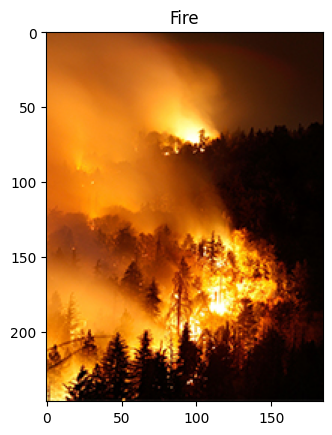

In [40]:
testing=image.load_img(test_image,target_size=(64,64))
testing=image.img_to_array(testing)
testing=testing/255
testing=np.expand_dims(testing,axis=0)
result=cnn.predict(testing)

Categories=['Fire','Smoke']

image_show=PIL.Image.open(test_image)
plt.imshow(image_show)

plt.title(Categories[int(result[0][0])])
plt.show()

In [43]:
test_image=r'C:\Users\acer\Documents\Major Project\Dataset\Data\test\Smoke\Smoke (1).jpg'

1/1 [==============================] - 0s 21ms/step


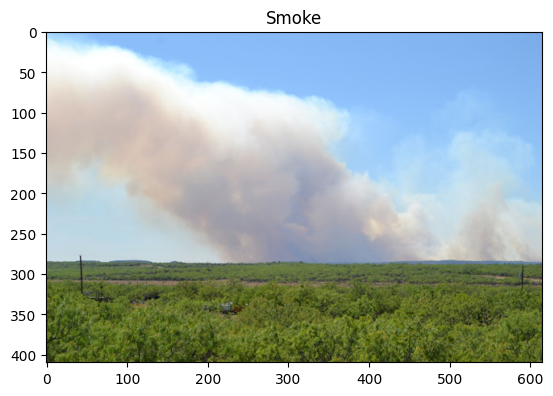

In [45]:
testing=image.load_img(test_image,target_size=(64,64))
testing=image.img_to_array(testing)
testing=testing/255
testing=np.expand_dims(testing,axis=0)
result=cnn.predict(testing)

Categories=['Smoke
            
            
            
            
            
            ','Smoke']

image_show=PIL.Image.open(test_image)
plt.imshow(image_show)

plt.title(Categories[int(result[0][0])])
plt.show()